In [1]:
from src.data_eng.datarequest import Series_requests
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from src.analytics.Metrics import Model_Metrics
import optuna
from sklearn.metrics import r2_score, mean_absolute_error
import os

import warnings
warnings.filterwarnings('ignore')


c:\Users\souza\credit-portfolio\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = os.path.join('..', 'data', 'dados_historicos_credit_portfolio.csv')
df = pd.read_csv(data_path)

In [3]:
df['data'] = pd.to_datetime(df['data'])
df = df.set_index('data')


In [4]:
df = df.dropna()

In [5]:
df_train = df.iloc[:153]
df_train

,Saldo da carteira de crédito,IPCA,Taxa de desocupação (PNADC),Endividamento das famílias(RNDBF),Inadimplência da carteira de crédito,Selic (M),PIB (M),Taxa média mensal de juros não rotativo,IBC-BR,Prazo médio das concessões de crédito
data,,,,,,,,,,
2012-03-01,953171,0.21,8.0,36.87,5.36,0.82,397757.8,2.53,102.72490,105.95
2012-04-01,964854,0.64,7.8,36.99,5.41,0.71,385882.7,2.49,98.16340,106.70
2012-05-01,980828,0.36,7.7,37.21,5.51,0.74,401863.7,2.36,101.46906,108.51
2012-06-01,994137,0.08,7.6,37.42,5.43,0.64,395379.2,2.31,99.86712,110.43
2012-07-01,1004184,0.43,7.5,37.54,5.42,0.68,409024.9,2.26,103.50475,111.51
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,3744082,0.38,6.8,47.85,3.70,0.91,1018642.6,2.37,111.60730,173.96
2024-08-01,3790764,-0.02,6.6,48.06,3.74,0.87,1003839.5,2.35,110.09557,174.08
2024-09-01,3831806,0.44,6.4,48.03,3.75,0.84,993453.8,2.36,107.08399,173.86


In [6]:
data_test = df.iloc[153:]
data_test

,Saldo da carteira de crédito,IPCA,Taxa de desocupação (PNADC),Endividamento das famílias(RNDBF),Inadimplência da carteira de crédito,Selic (M),PIB (M),Taxa média mensal de juros não rotativo,IBC-BR,Prazo médio das concessões de crédito
data,,,,,,,,,,
2024-12-01,3965534,0.52,6.2,48.44,3.54,0.93,999160.6,2.41,104.08432,177.65
2025-01-01,4013980,0.16,6.5,48.63,3.78,1.01,958037.7,2.47,102.89616,176.46
2025-02-01,4040708,1.31,6.8,48.61,3.85,0.99,994436.6,2.54,106.97556,177.17
2025-03-01,4083812,0.56,7.0,48.97,3.91,0.96,1072248.6,2.57,114.19661,174.36
2025-04-01,4116655,0.43,6.6,48.88,4.13,1.06,1087566.1,2.60,112.58813,178.26
2025-05-01,4133403,0.26,6.2,48.88,4.24,1.14,1062656.9,2.62,108.57626,179.72
2025-06-01,4155742,0.24,5.8,48.81,4.29,1.10,1050122.0,2.64,107.25421,181.02
2025-07-01,4188077,0.26,5.6,48.64,4.54,1.28,1095262.0,2.61,113.23431,181.18
2025-08-01,4226068,-0.11,5.6,48.93,4.79,1.16,1066136.7,2.62,110.48903,179.72


In [7]:
X = df_train.drop('Saldo da carteira de crédito', axis=1)
y = df_train['Saldo da carteira de crédito']

In [8]:
data_test = data_test.dropna()
X_test = data_test.drop('Saldo da carteira de crédito', axis=1)
y_test = data_test['Saldo da carteira de crédito']

In [9]:
X_test

,IPCA,Taxa de desocupação (PNADC),Endividamento das famílias(RNDBF),Inadimplência da carteira de crédito,Selic (M),PIB (M),Taxa média mensal de juros não rotativo,IBC-BR,Prazo médio das concessões de crédito
data,,,,,,,,,
2024-12-01,0.52,6.2,48.44,3.54,0.93,999160.6,2.41,104.08432,177.65
2025-01-01,0.16,6.5,48.63,3.78,1.01,958037.7,2.47,102.89616,176.46
2025-02-01,1.31,6.8,48.61,3.85,0.99,994436.6,2.54,106.97556,177.17
2025-03-01,0.56,7.0,48.97,3.91,0.96,1072248.6,2.57,114.19661,174.36
2025-04-01,0.43,6.6,48.88,4.13,1.06,1087566.1,2.60,112.58813,178.26
2025-05-01,0.26,6.2,48.88,4.24,1.14,1062656.9,2.62,108.57626,179.72
2025-06-01,0.24,5.8,48.81,4.29,1.10,1050122.0,2.64,107.25421,181.02
2025-07-01,0.26,5.6,48.64,4.54,1.28,1095262.0,2.61,113.23431,181.18
2025-08-01,-0.11,5.6,48.93,4.79,1.16,1066136.7,2.62,110.48903,179.72


Arvore de decisão: métricas de treino
    R²  MAE  MSE  MAPE(%)
0  1.0  0.0  0.0      0.0
Arvore de decisão: métricas de teste
         R²            MAE           MSE   MAPE(%)
0 -6.668151  313925.583333  1.095323e+11  0.074973
Random forest: métricas de treino
         R²          MAE           MSE   MAPE(%)
0  0.999598  9974.311176  2.652396e+08  0.004732
Random forest: métricas de teste
          R²            MAE           MSE   MAPE(%)
0 -21.046905  541236.048333  3.149192e+11  0.129325
Histboost: métricas de treino
        R²           MAE           MSE  MAPE(%)
0  0.99815  21787.842247  1.222447e+09  0.01032
Histboost: métricas de teste
          R²            MAE           MSE   MAPE(%)
0 -12.976212  433825.257944  1.996370e+11  0.103716
Xgboost: métricas de treino
    R²       MAE         MSE   MAPE(%)
0  1.0  7.457108  110.502678  0.000004
Xgboost: métricas de teste
         R²           MAE           MSE   MAPE(%)
0 -6.126268  304750.71875  1.017920e+11  0.072941


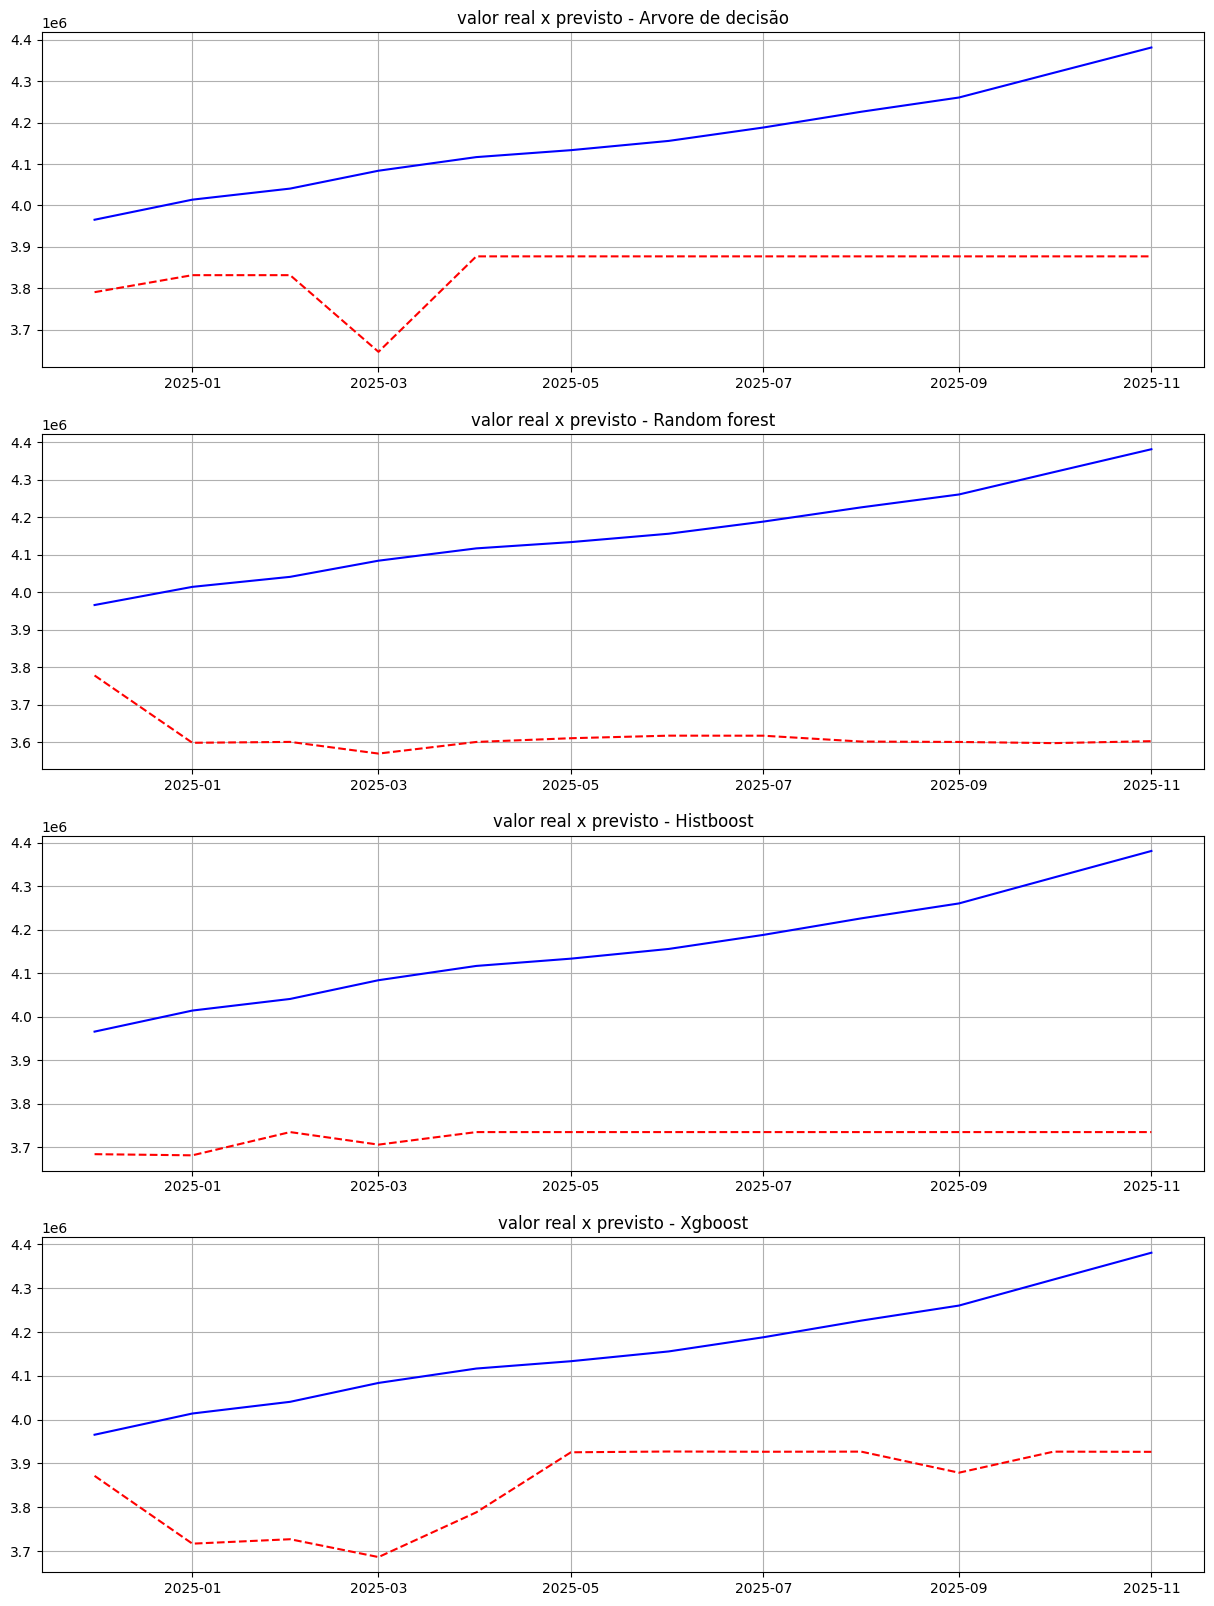

In [10]:
# treinando modelos 
models = {
    'Arvore de decisão': DecisionTreeRegressor(random_state=42),
    'Random forest': RandomForestRegressor(random_state=42),
    #'Adaboost':AdaBoostRegressor(random_state=42),
    'Histboost':HistGradientBoostingRegressor(random_state=42),
    'Xgboost':XGBRegressor()
}
fig, ax = plt.subplots(len(models), 1, figsize=(15, 2 * len(df.columns)))

for (i, model), axes in zip(models.items(), ax):
    model_ = model.fit(X, y)
    y_pred = model.predict(X)
    y_pred = pd.Series(y_pred, index=X.index, name='y_pred')
    print('==='*50)

    print(f'{i}: métricas de treino')
    metrics_train = Model_Metrics(y_pred, y)
    print(metrics_train.metrics())
    
    print(f'{i}: métricas de teste')
    y_pred_test = model_.predict(X_test)
    y_pred_test = pd.Series(y_pred_test, index=X_test.index, name='y_pred_test')
    metrics_test = Model_Metrics(y_pred_test, y_test)
    print(metrics_test.metrics())
    print('==='*50)

    axes.set_title(f'valor real x previsto - {i}')
    axes.plot(y_test, label='real', color='blue')
    axes.plot(y_pred_test, label='previsto - teste', color='red', linestyle='--')
    axes.grid()
    

        

SHAP modelo - Arvore de decisão


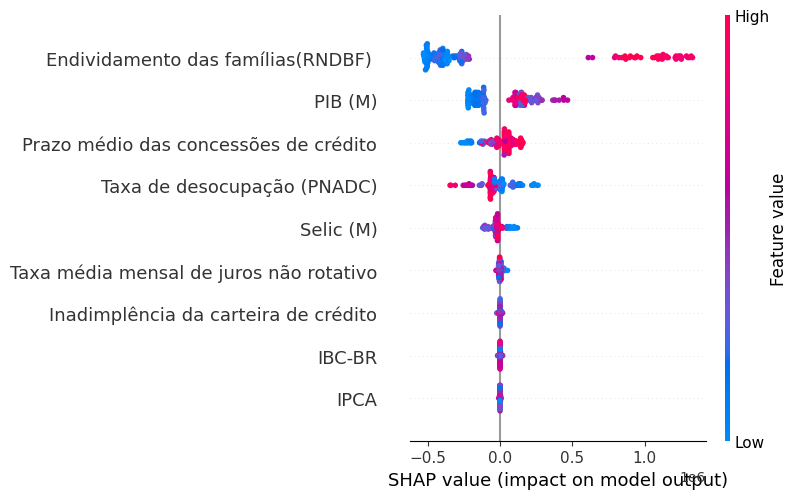

SHAP modelo - Random forest


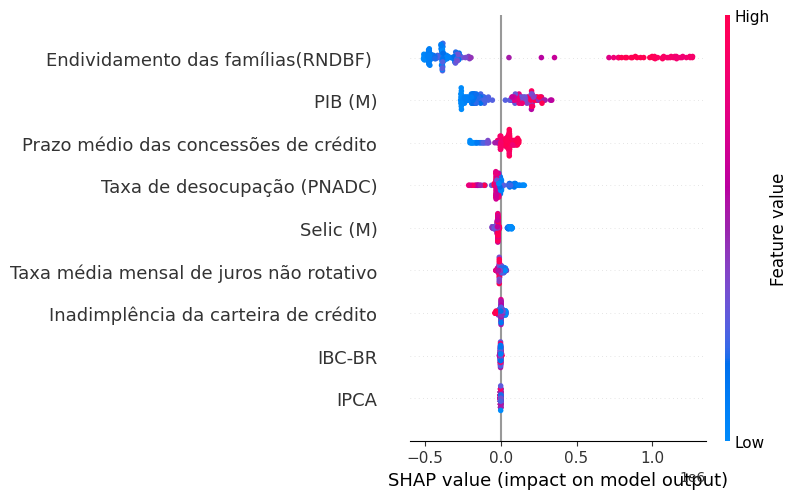

SHAP modelo - Histboost


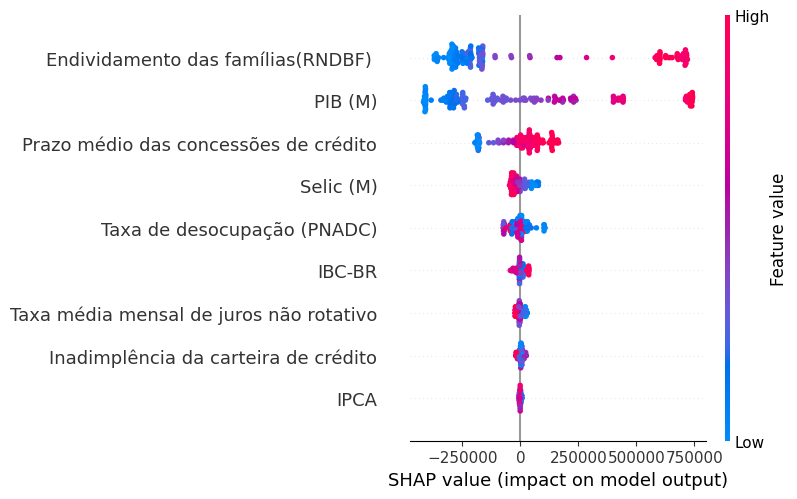

SHAP modelo - Xgboost


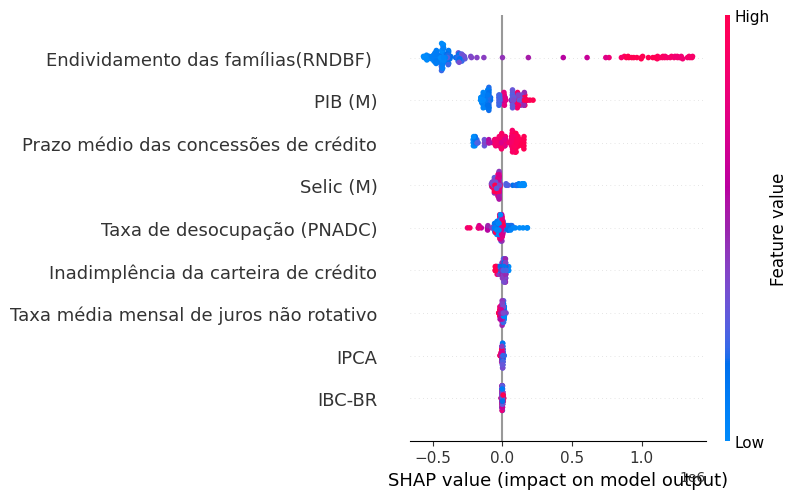

In [11]:
for i, shap in models.items():
    model = shap.fit(X, y)
    pred_shap = model.predict(X)
    print(f'SHAP modelo - {i}')
    Model_Metrics(pred_shap, y).plot_shap(shap, X)

const                                      1.544242e+06
IPCA                                      -2.091357e+05
Taxa de desocupação (PNADC)               -1.782581e+04
Endividamento das famílias(RNDBF)          2.737524e+04
Inadimplência da carteira de crédito      -2.176568e+05
Selic (M)                                  8.247187e+05
PIB (M)                                    3.031878e+00
Taxa média mensal de juros não rotativo   -8.818517e+05
IBC-BR                                    -4.578285e+03
Prazo médio das concessões de crédito      2.753135e+03
dtype: float64


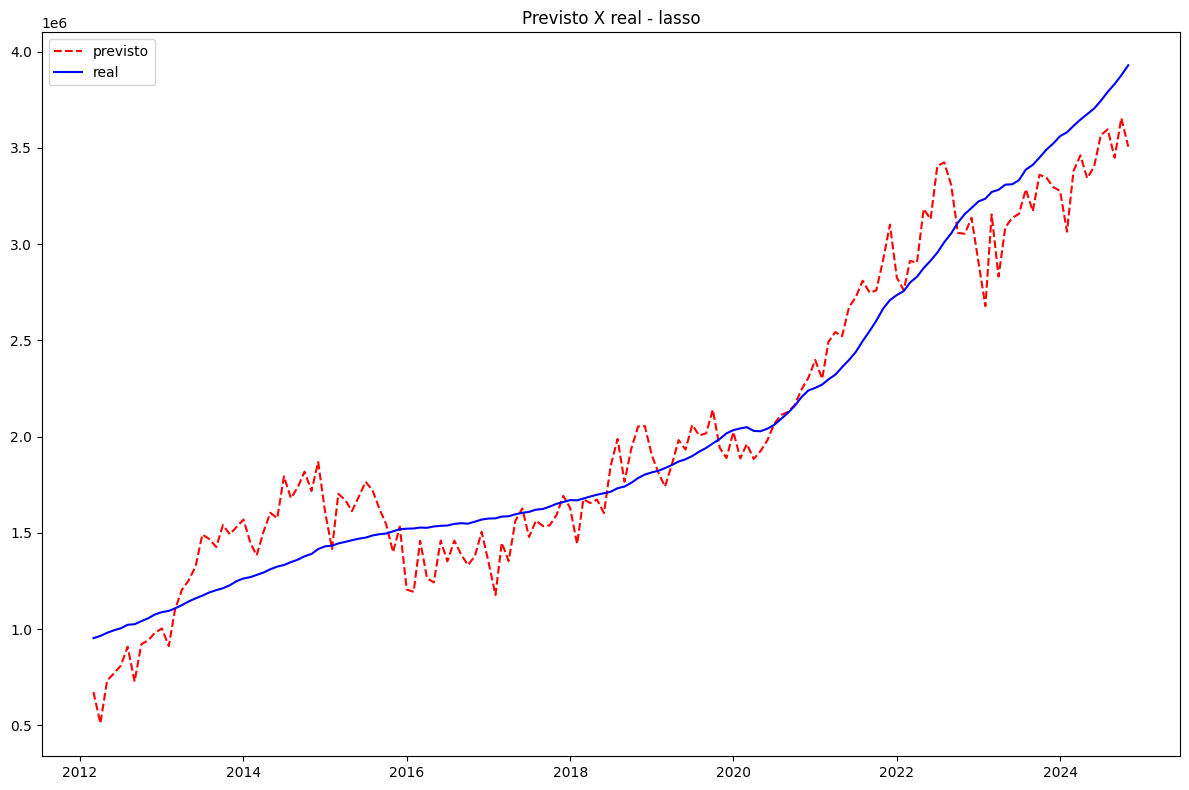

In [12]:
# rodando modelo lasso 
lasso = sm.OLS(y, sm.add_constant(X)).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.1)
print(lasso.params)
lasso_pred = lasso.predict(sm.add_constant(X))
plt.figure(figsize=(12,8))
plt.title('Previsto X real - lasso')
plt.plot(lasso_pred, color='red', linestyle='--', label='previsto')
plt.plot(y, color='blue', label='real')
plt.tight_layout()
plt.legend()
plt.show()

-2159.285535580401
221480.62855792503


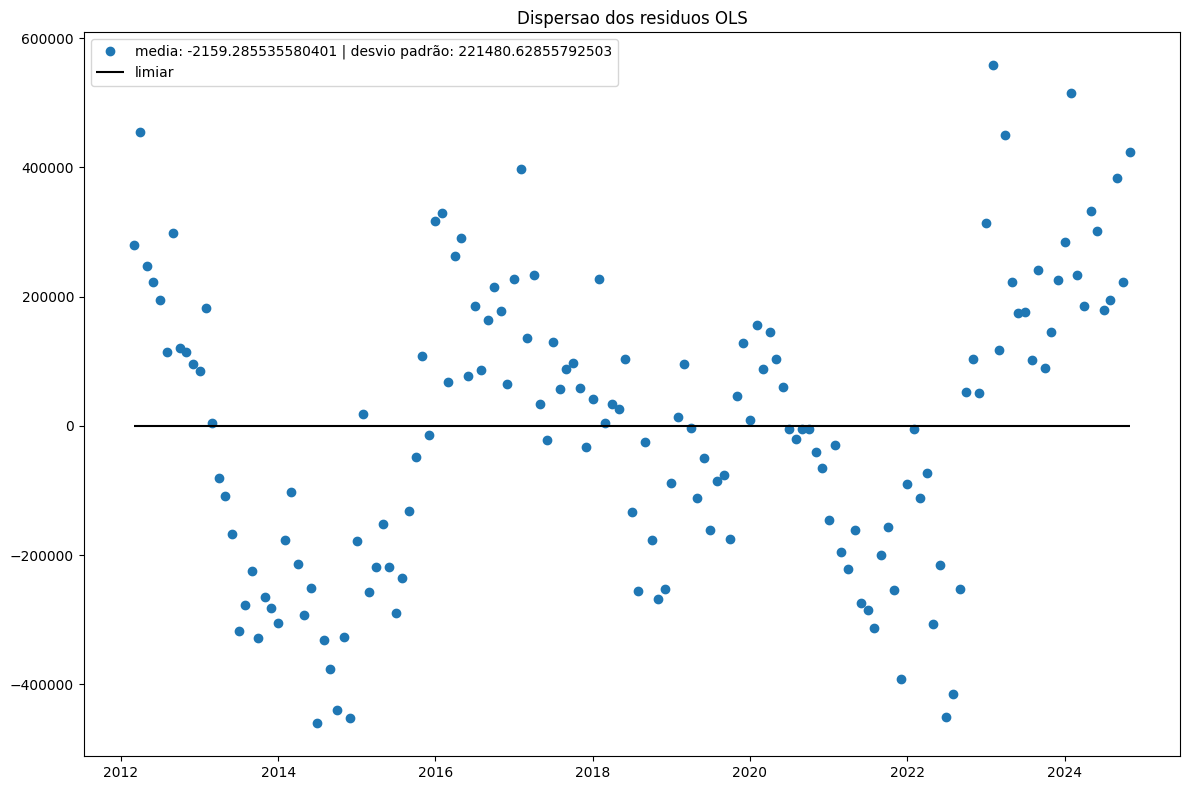

In [13]:
resid = y - lasso_pred
print(resid.mean())
print(resid.std())
plt.figure(figsize=(12,8))
plt.title('Dispersao dos residuos OLS')
plt.plot(resid, marker='o', linestyle='none', label=f'media: {resid.mean()} | desvio padrão: {resid.std()}')
plt.hlines(y=0, xmin=y.index.min(), xmax=y.index.max(), color='black', label='limiar')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# metricas globais lasso
metrics = Model_Metrics(lasso_pred, y)
print(metrics.metrics())


         R²            MAE           MSE  MAPE(%)
0  0.926224  182558.496411  4.873772e+10   0.1036


Por mais que apresente métricas globais consistentes, tolerancia a multicolinearidade e robustez estatistica, o lasso nao vai ser util nesse trabalho. O motivo é a presença de heterocedasticidade, evidenciada graficamente por sua grande mudança de variaçao em relaçao ao tempo. 

In [ ]:
from statsmodels.regression.linear_model import WLS

model_wls = WLS(y, sm.add_constant(X)).fit_regularized(method='elastic_net', alpha=1, L1_wt=0)
wls_pred = model_wls.predict(sm.add_constant(X))
print(model_wls.params)
print()
print('metrica de treino:')
print()
print(Model_Metrics(wls_pred, y).metrics())

const                                    -3033.433863
Taxa de desocupação (PNADC)             -15675.744363
Endividamento das famílias(RNDBF)       -15680.758997
Inadimplência da carteira de crédito    -13873.651814
Selic (M)                                  907.623624
PIB (M)                                      4.904235
Prazo médio das concessões de crédito    -1302.529661
dtype: float64

metrica de treino:

         R²           MAE           MSE   MAPE(%)
0  0.979917  83882.538068  1.326742e+10  0.045728


Mudança em relaçao ao estudo: 

A minha ideia inicial era, atraves de simulaçoes via Monte Carlo e picos e choques, estimar um intervalo médio para possiveis trajetorias do valor pontual da carteira de crédito. Porem, pela limitaçao das escalas e problemas com as estruturas numericas, me vejo mais interessado em explorar a estimativa da TAXA DE VARIAÇAO do sinal de crédito, utilizando log das diferenças. 

In [86]:
def log_diff(data:pd.DataFrame):
    return np.log(data).diff().dropna()
data_diff = log_diff(df_train)

In [104]:
X_diff = data_diff.drop('Saldo da carteira de crédito', axis=1)
y_diff = data_diff['Saldo da carteira de crédito']


In [106]:
wls_diff_model = WLS(y_diff, sm.add_constant(X_diff)).fit(cov_kwds={'maxlags':12}, cov_type='HAC')
print(wls_diff_model.summary())

                                 WLS Regression Results                                 
Dep. Variable:     Saldo da carteira de crédito   R-squared:                       0.607
Model:                                      WLS   Adj. R-squared:                  0.578
Method:                           Least Squares   F-statistic:                     58.58
Date:                          Fri, 06 Feb 2026   Prob (F-statistic):           2.89e-40
Time:                                  16:34:33   Log-Likelihood:                 571.94
No. Observations:                           133   AIC:                            -1124.
Df Residuals:                               123   BIC:                            -1095.
Df Model:                                     9                                         
Covariance Type:                            HAC                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
--